<a href="https://colab.research.google.com/github/akshpatel26/Machine-Learning-Model/blob/main/EDA_and_ML_Model_Training_of_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/ML-aksh/Data/StudentsPerformance.csv')
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (1000, 8)

Show Top 10 Records


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()  #Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()


,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


#  Print numerical and categorical columns

In [11]:
# Define numerical & categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 3 numerical columns(features) : ['math score', 'reading score', 'writing score']

We have 5 categorical columns(features) : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
# print("Categories in 'gender' variable:     ",end=" " )
# print(df['gender'].unique())
for feature in df.columns :
    if df[feature].dtype == 'O':
        print('Categories in {} variable : {}'.format(feature,df[feature].unique()))

Categories in gender variable : ['female' 'male']
Categories in race/ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test preparation course variable : ['none' 'completed']


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full_score = df[df['math score']==100]['math score'].count()
reading_full_score = df[df['reading score']==100]['reading score'].count()
writing_full_score =  df[df['writing score']==100]['writing score'].count()

print(f'Number of students with full marks in Maths: {math_full_score }')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

math_less_25 = df[df['math score'] <= 25]['math score'].count()
reading_less_25 = df[df['reading score'] <= 25]['reading score'].count()
writing_less_25 = df[df['writing score'] <= 25]['writing score'].count()


print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with less than 25 marks in Maths: 7
Number of students with less than 25 marks in Reading: 4
Number of students with less than 25 marks in Writing: 5


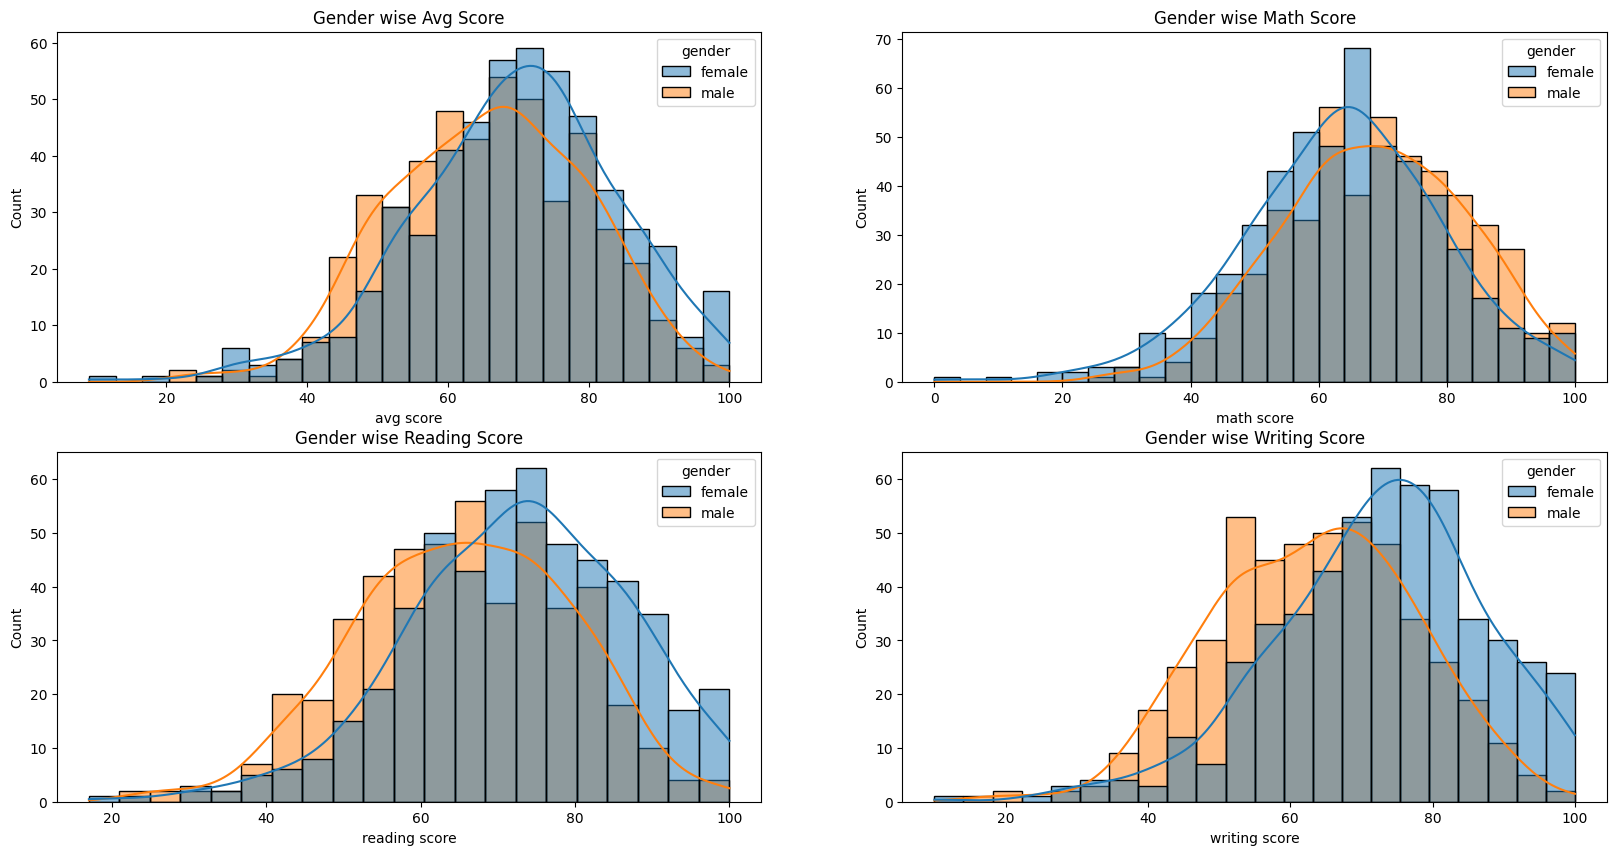

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df,x='avg score',kde=True,hue='gender',ax=axs[0, 0])
axs[0, 0].set_title('Gender wise Avg Score')

sns.histplot(data=df,x='math score',kde=True,hue='gender',ax=axs[0, 1])
axs[0, 1].set_title('Gender wise Math Score')

sns.histplot(data=df,x='reading score',kde=True,hue='gender',ax=axs[1, 0])
axs[1, 0].set_title('Gender wise Reading Score')

sns.histplot(data=df,x='writing score',kde=True,hue='gender',ax=axs[1, 1])
axs[1, 1].set_title('Gender wise Writing Score')

plt.show()

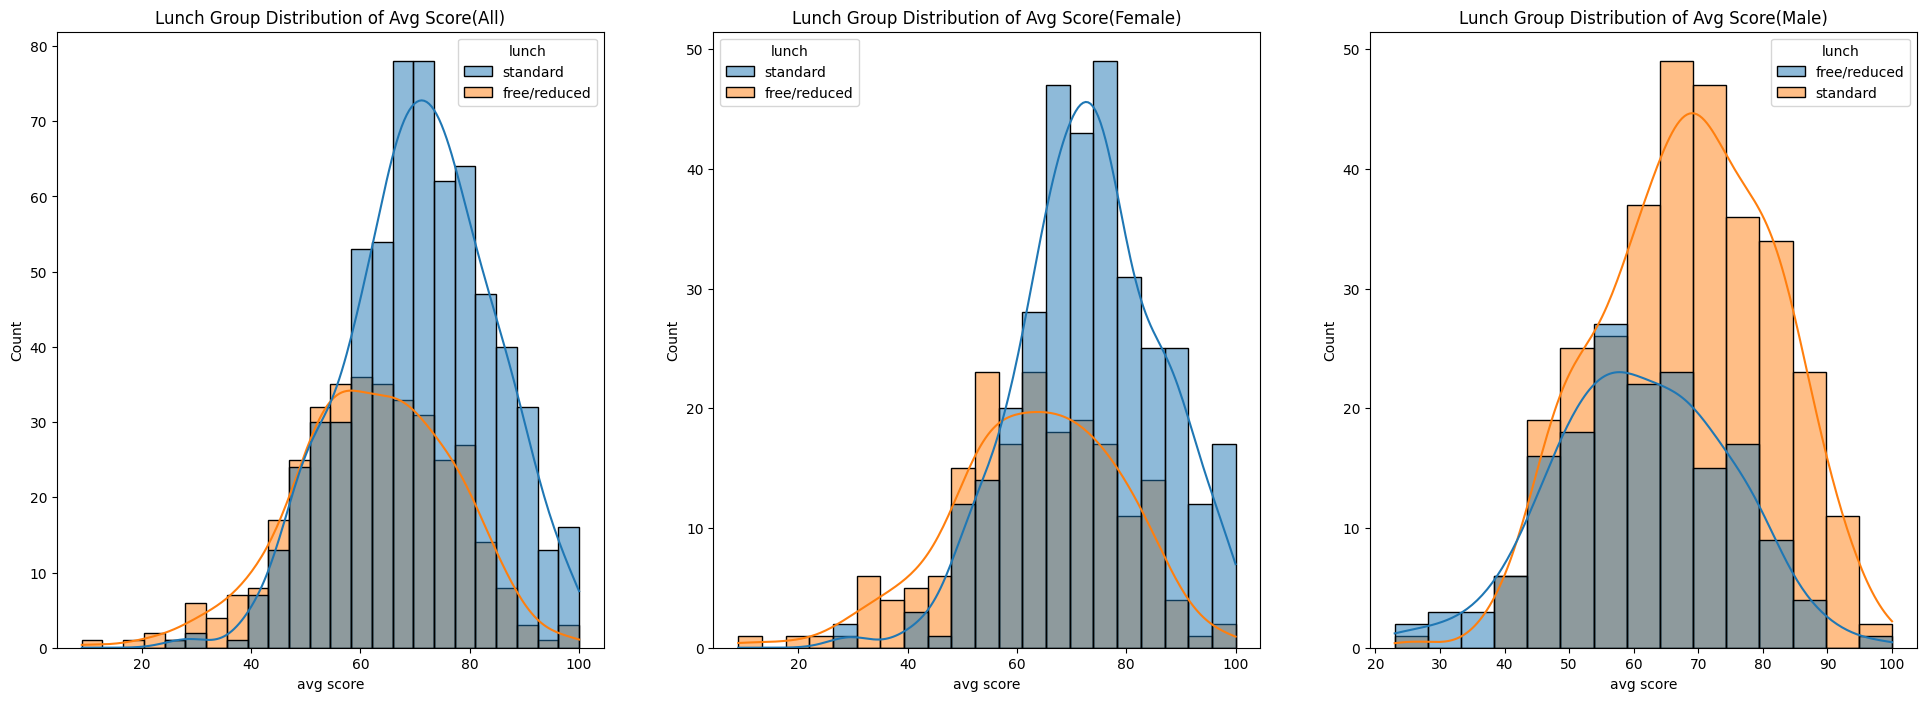

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('Lunch Group Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='lunch', ax=axs[0])

axs[1].set_title('Lunch Group Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='lunch', ax=axs[1])

axs[2].set_title('Lunch Group Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='lunch', ax=axs[2])

plt.show()

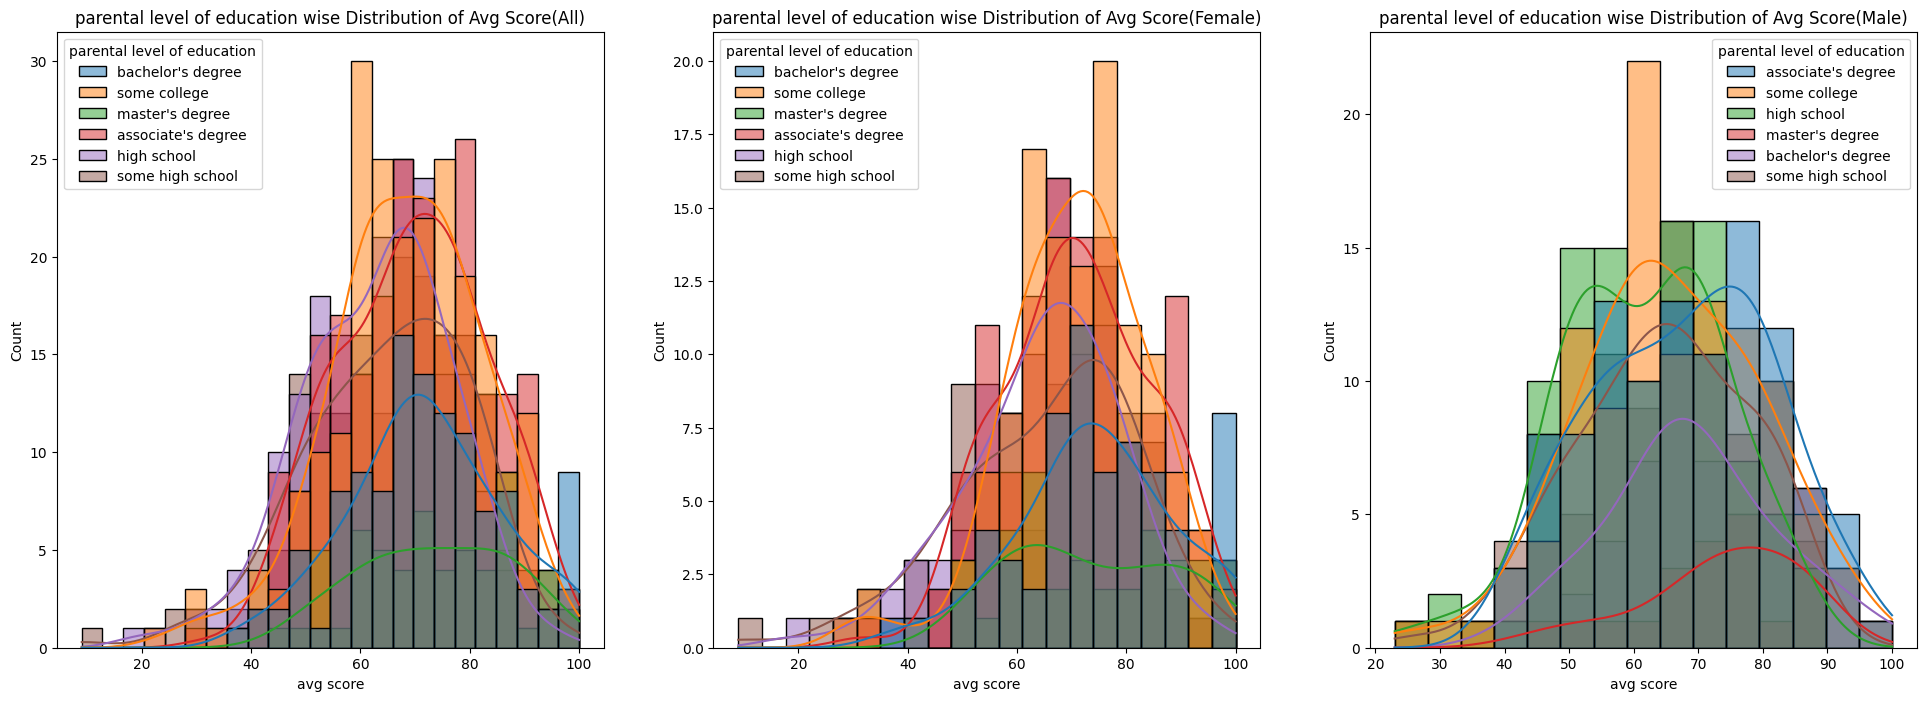

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('parental level of education wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='parental level of education', ax=axs[0])

axs[1].set_title('parental level of education wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='parental level of education', ax=axs[1])

axs[2].set_title('parental level of education wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='parental level of education', ax=axs[2])

plt.show()

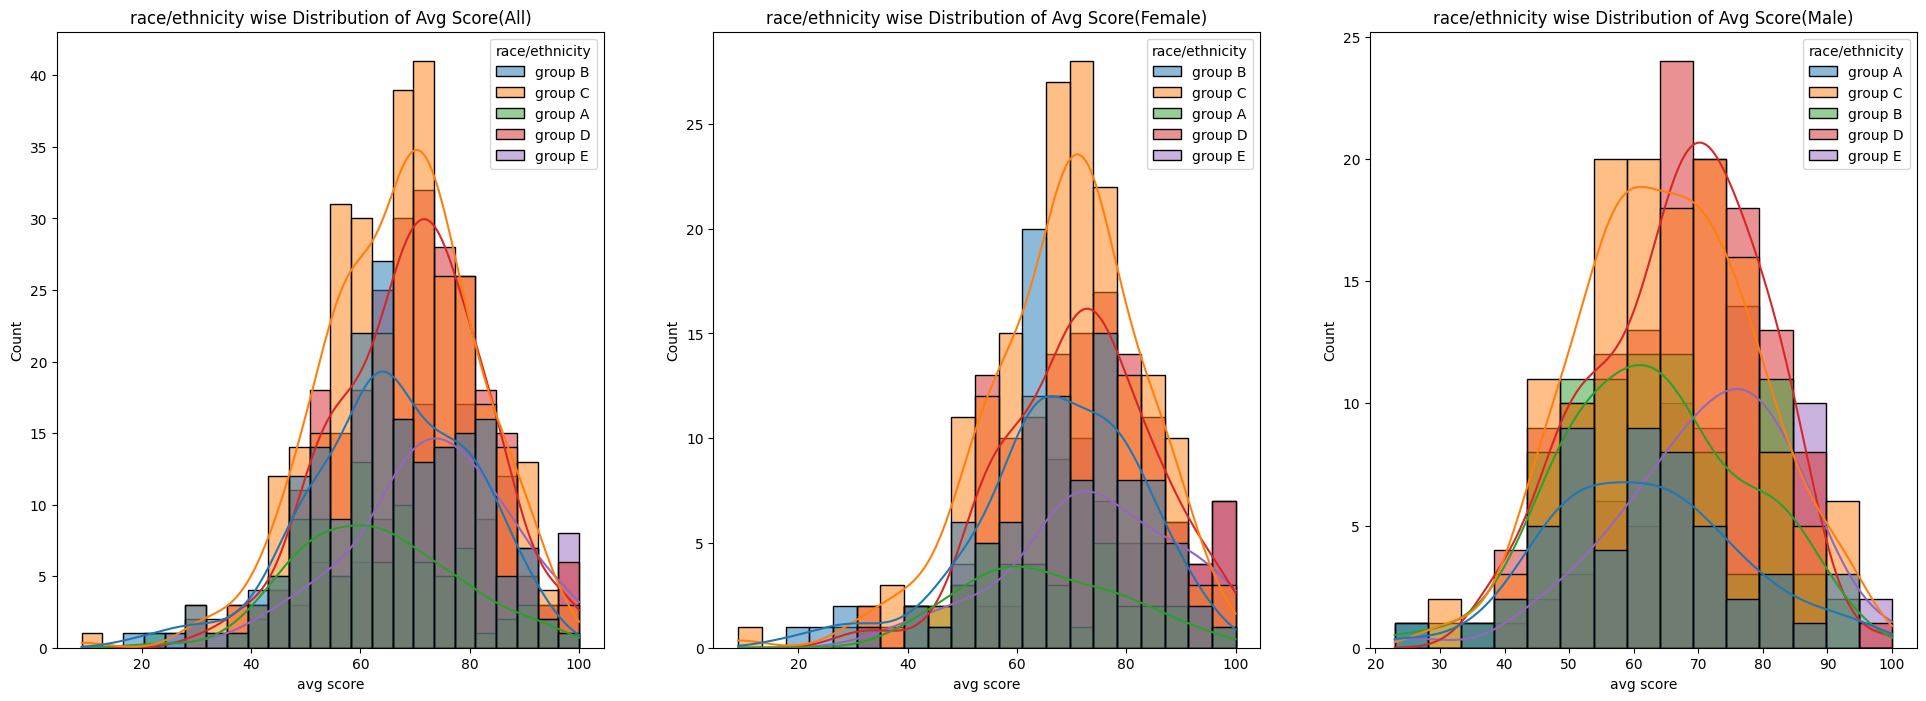

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('race/ethnicity wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='race/ethnicity', ax=axs[0])

axs[1].set_title('race/ethnicity wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[1])

axs[2].set_title('race/ethnicity wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()

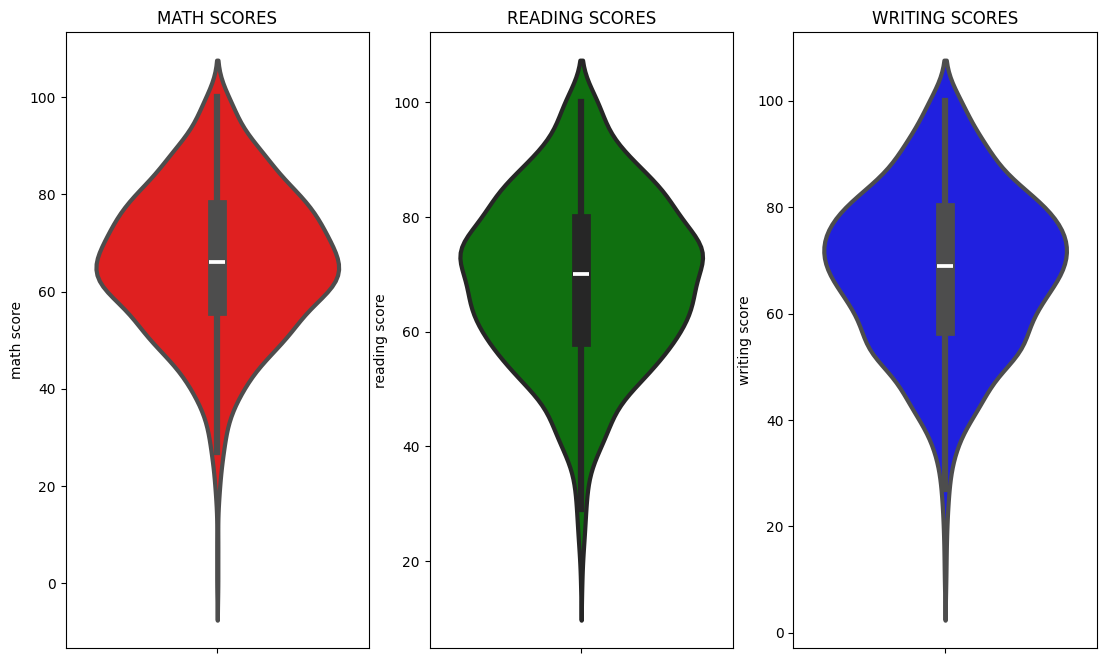

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

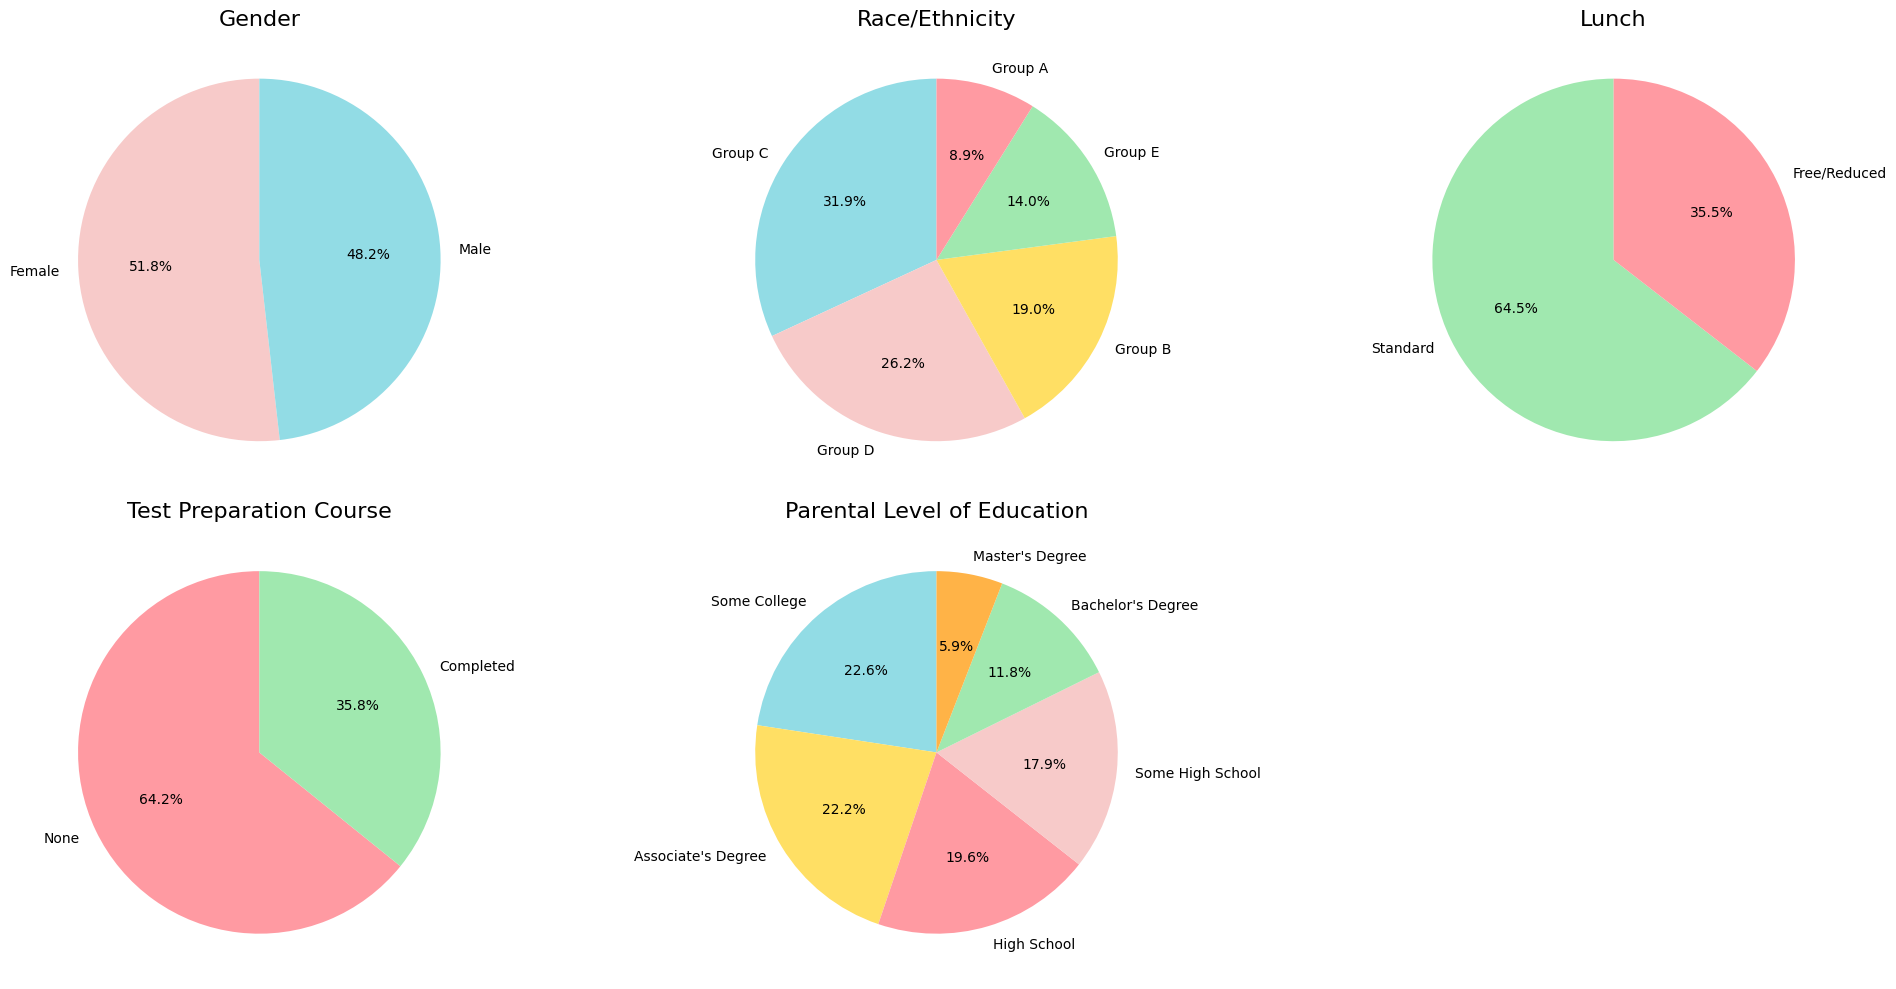

In [21]:
plt.figure(figsize=(20, 10))

# Gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#F7CAC9', '#92DCE5']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Gender',fontsize=16)

# Race/Ethnicity
plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#92DCE5', '#F7CAC9', '#FFDF64', '#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Race/Ethnicity',fontsize=16)

# Lunch
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Lunch',fontsize=16)

# Test Preparation Course
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['#FF9AA2', '#A0E8AF']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Test Preparation Course',fontsize=16)

# Parental Level of Education
plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
colors = ['#92DCE5', '#FFDF64', '#FF9AA2', '#F7CAC9', '#A0E8AF', '#FFB347']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Parental Level of Education',fontsize=16)

plt.tight_layout()
plt.show()


# Feature wise Visualization

<ipython-input-22-a92df602e237>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)
<ipython-input-22-a92df602e237>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=df['gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)


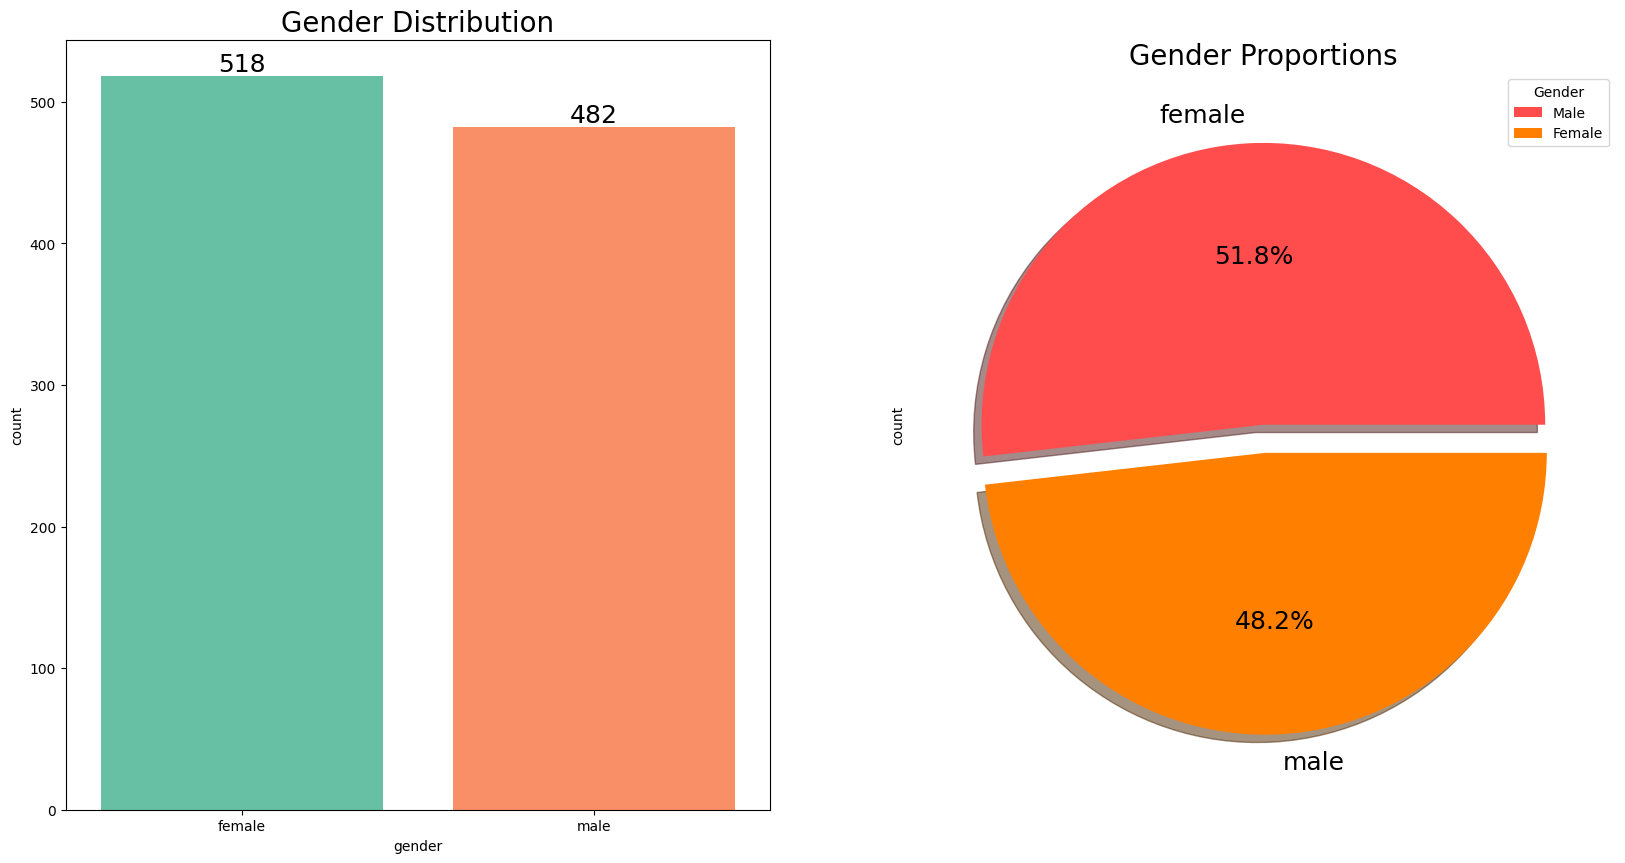

In [22]:
# set the color palette
colors = sns.color_palette('Set2')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=18)

# plot the pie chart
pie_colors = ['#ff4d4d', '#ff8000']
df['gender'].value_counts().plot(kind='pie', colors=pie_colors, explode=[0, 0.1],
                                 autopct='%1.1f%%', shadow=True, ax=ax[1], textprops={'fontsize': 18})
# set title and legend
ax[0].set_title('Gender Distribution', fontsize=20)
ax[1].set_title('Gender Proportions', fontsize=20)
ax[1].legend(title='Gender', loc='best', labels=['Male', 'Female'])

# show the plot
plt.show()


In [23]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,avg score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<ipython-input-25-48657a528c84>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['avg score'][0], gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0]]
<ipython-input-25-48657a528c84>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['avg score'][1], gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1]]


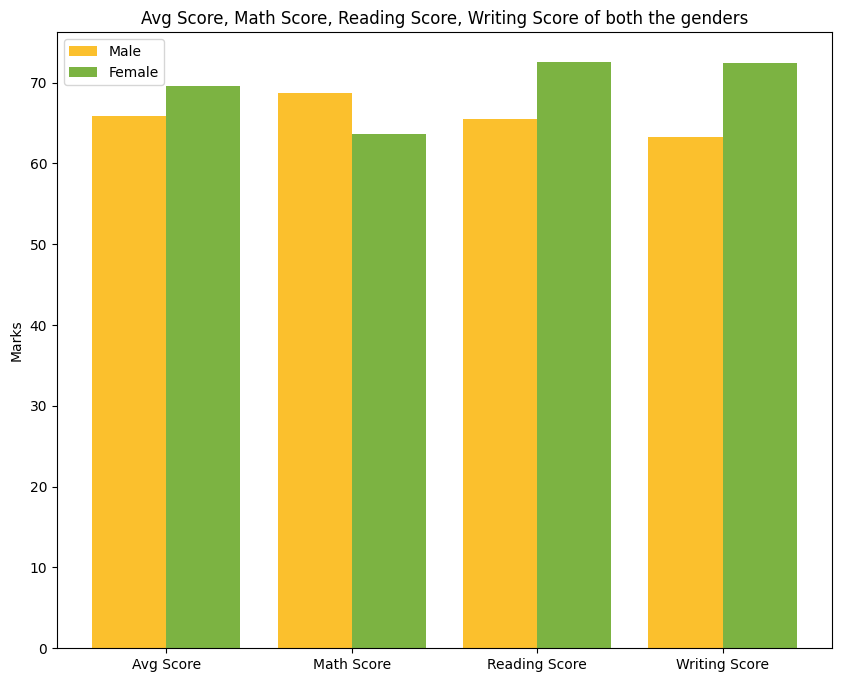

In [ ]:
sns.set_palette('Set2')
plt.figure(figsize=(10, 8))

X = ['Avg Score', 'Math Score', 'Reading Score', 'Writing Score']
female_scores = [gender_group['avg score'][0], gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0]]
male_scores = [gender_group['avg score'][1], gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#FBC02D')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#7CB342')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Avg Score, Math Score, Reading Score, Writing Score of both the genders")
plt.legend()
plt.show()

<ipython-input-24-37dfd768b9a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
<ipython-input-24-37dfd768b9a3>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)


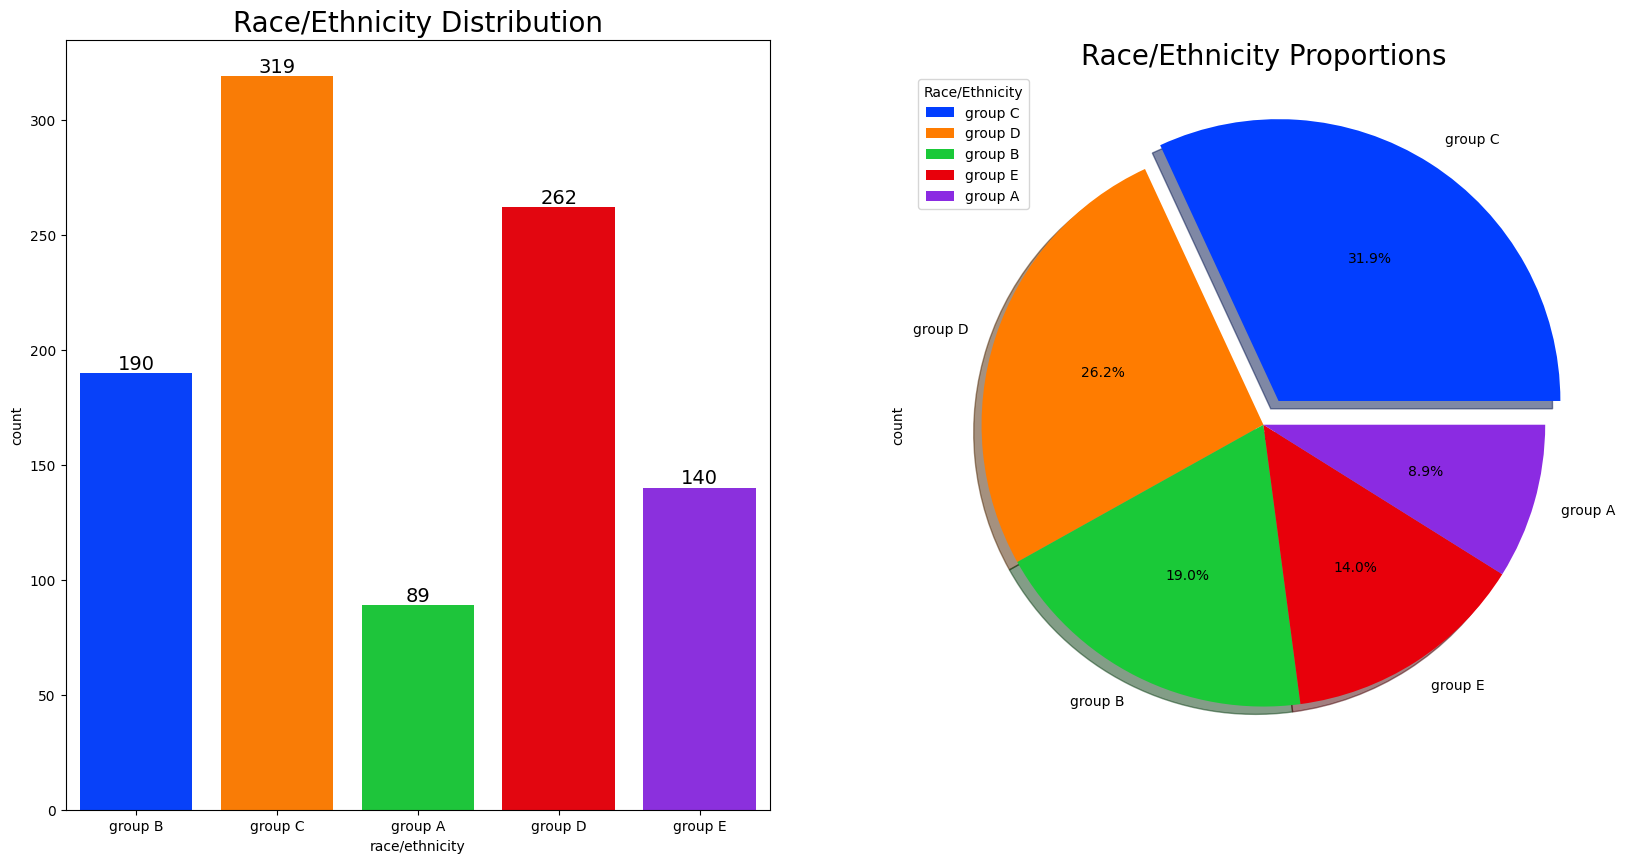

In [24]:
# set the color palette
colors = sns.color_palette('bright')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the pie chart
explode = [0.1, 0, 0, 0, 0]
df['race/ethnicity'].value_counts().plot(kind='pie', colors=colors, explode=explode,
                                         autopct='%1.1f%%', shadow=True, ax=ax[1])
# set title and legend
ax[0].set_title('Race/Ethnicity Distribution', fontsize=20)
ax[1].set_title('Race/Ethnicity Proportions', fontsize=20)
ax[1].legend(title='Race/Ethnicity', loc='best', labels=df['race/ethnicity'].value_counts().index)

# show the plot
plt.show()

<ipython-input-25-de5ac7ab5fd6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='crest', ax=ax[0])
<ipython-input-25-de5ac7ab5fd6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
<ipython-input-25-de5ac7ab5fd6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score

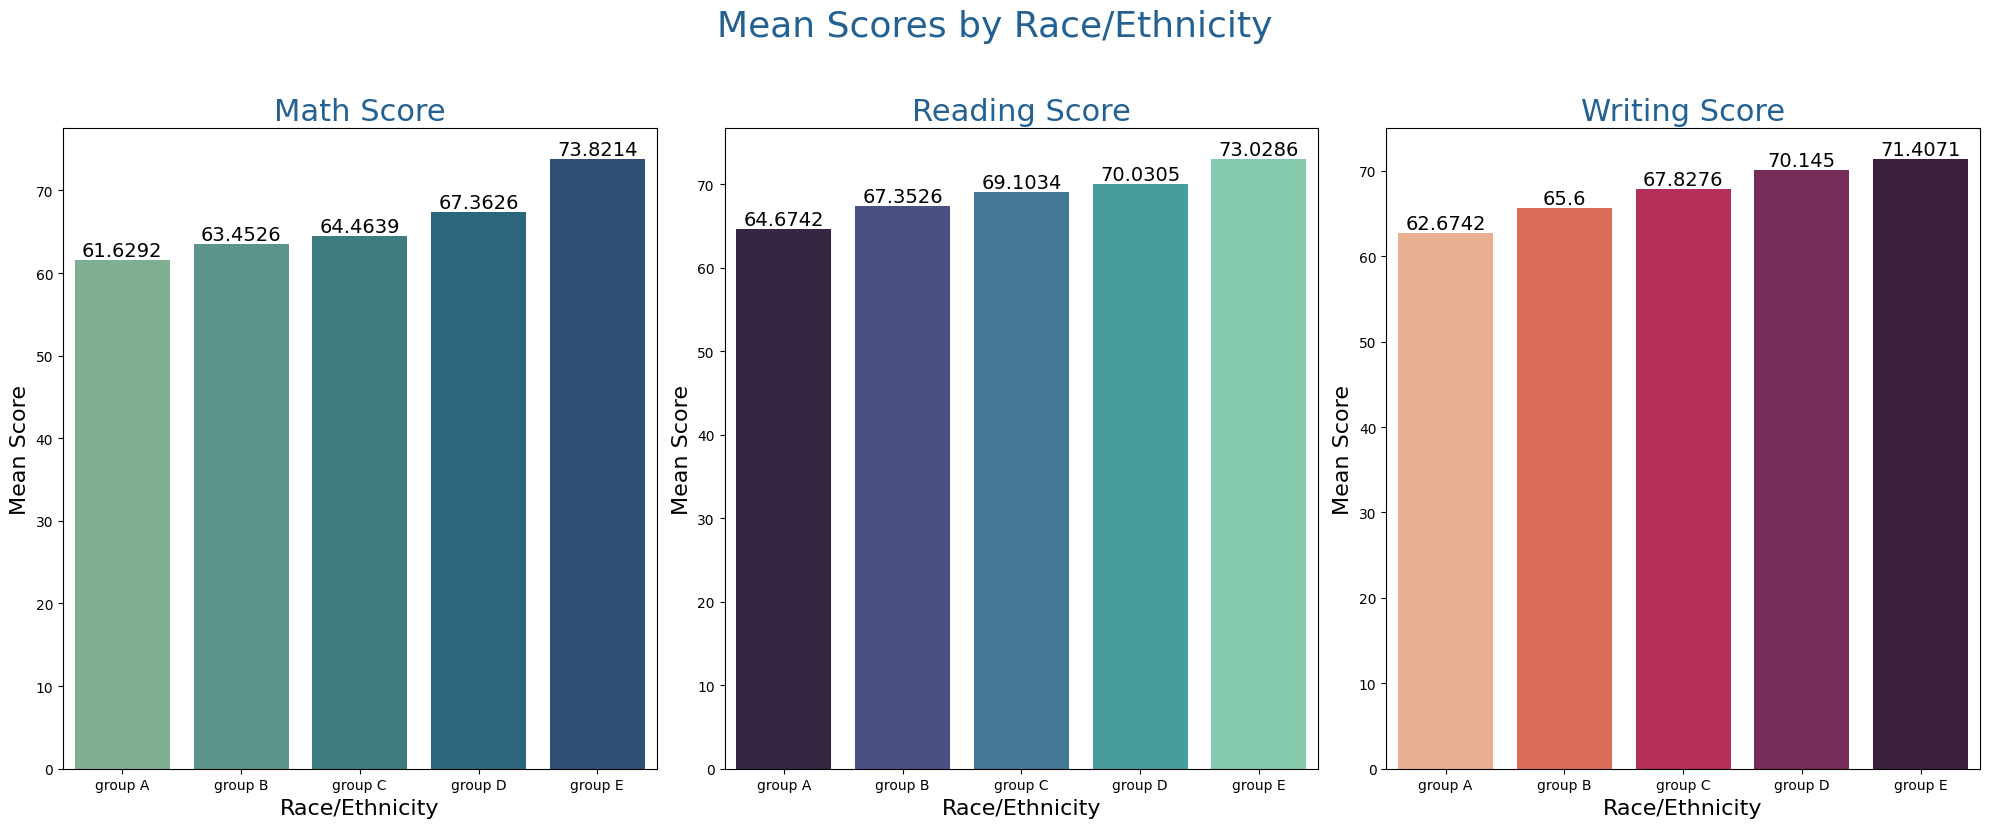

In [25]:
Group_data2 = df.groupby('race/ethnicity')

# create the subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# plot the math scores
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='crest', ax=ax[0])
ax[0].set_title('Math Score', color='#236192', size=22)
ax[0].set_xlabel('Race/Ethnicity', fontsize=16)
ax[0].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the reading scores
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#236192', size=22)
ax[1].set_xlabel('Race/Ethnicity', fontsize=16)
ax[1].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=14)

# plot the writing scores
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='rocket_r', ax=ax[2])
ax[2].set_title('Writing Score', color='#236192', size=22)
ax[2].set_xlabel('Race/Ethnicity', fontsize=16)
ax[2].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', fontsize=14)

plt.suptitle('Mean Scores by Race/Ethnicity', fontsize=26, color='#236192', y=1.03)
plt.tight_layout()
plt.show()


<ipython-input-26-7d281f8447cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='parental level of education', data=df, palette='Blues')


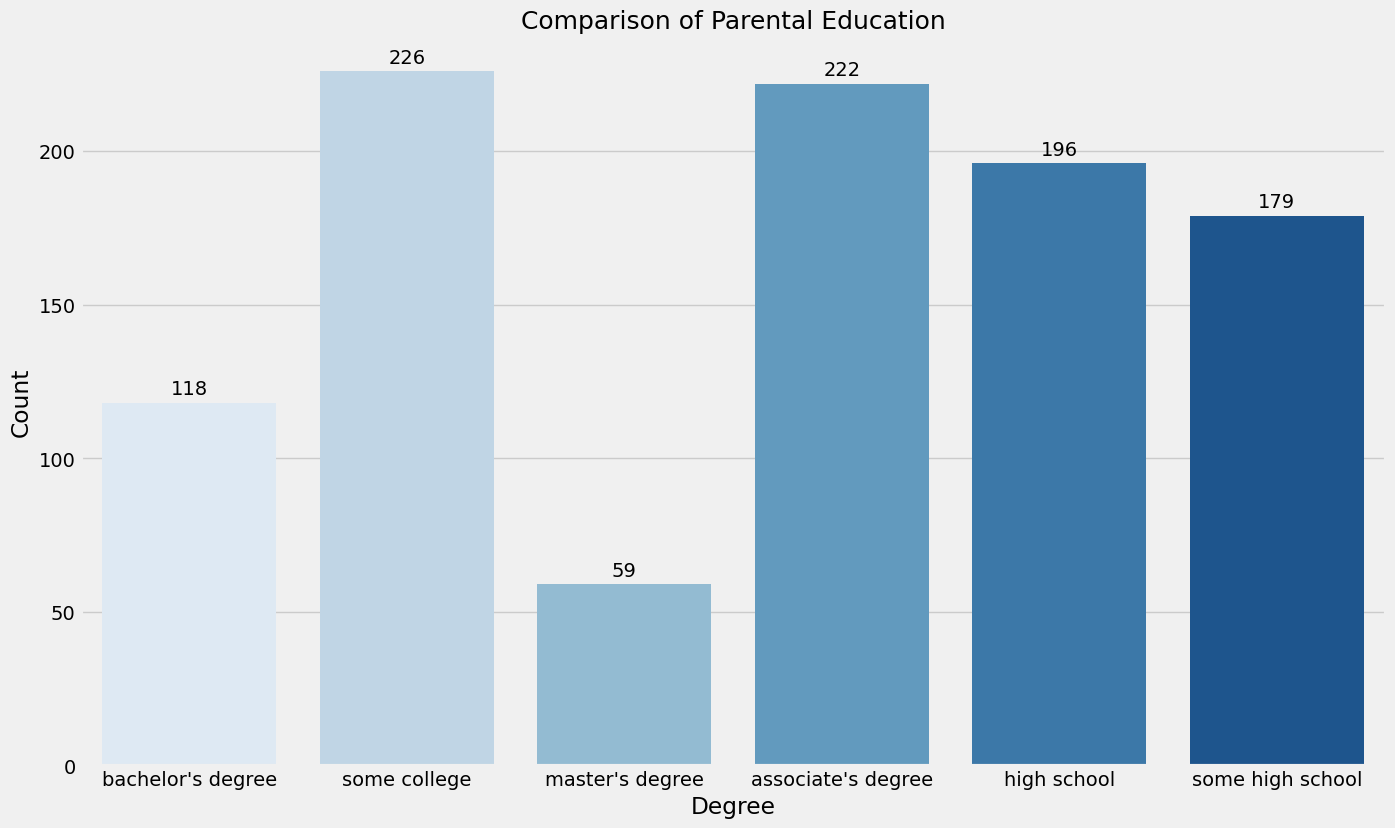

In [26]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='parental level of education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontsize=18)
ax.set(xlabel='Degree', ylabel='Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()


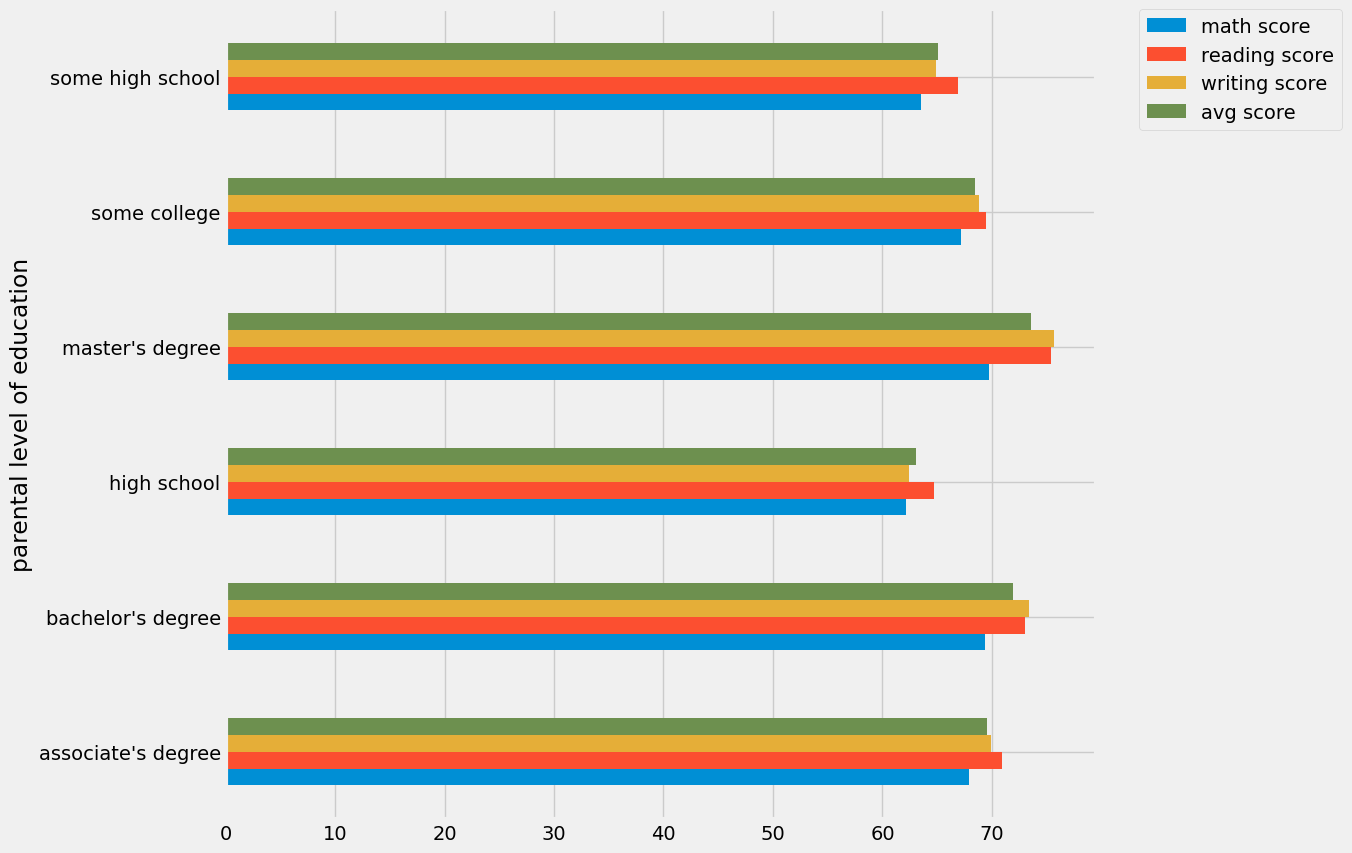

In [27]:
df.groupby('parental level of education').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean','avg score':'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

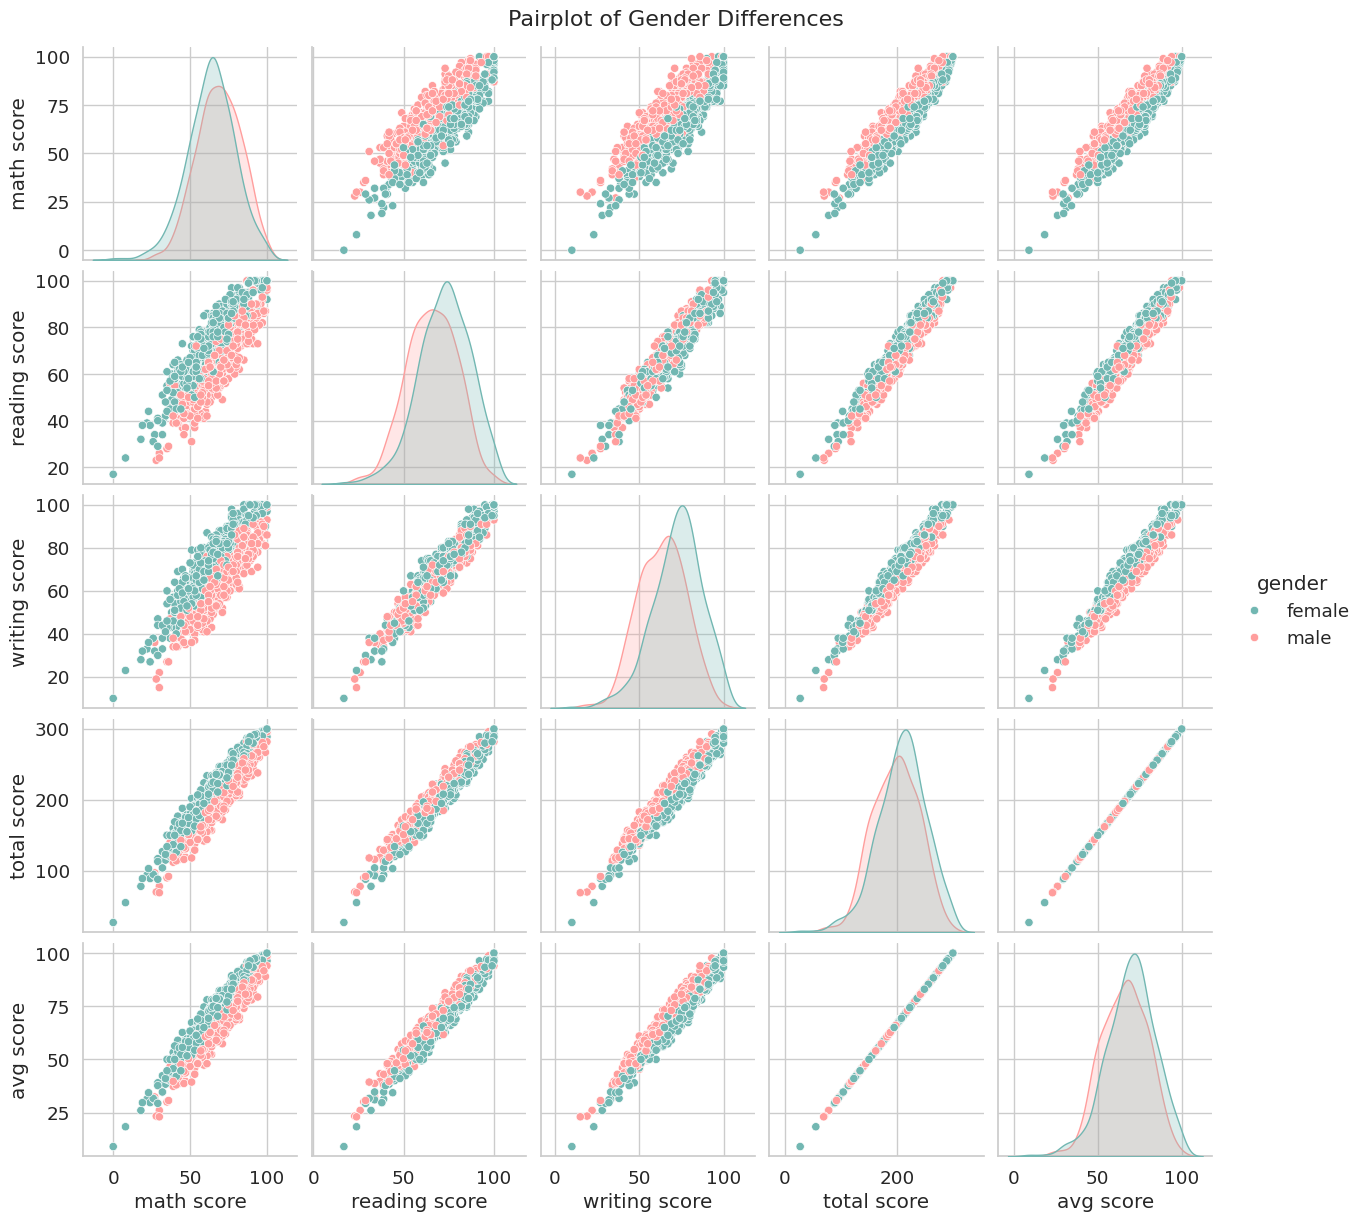

In [28]:
# Use a modern color palette
colors = ["#72b7b2", "#ff9e9d"]

# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create pairplot with hue and custom color palette
sns.pairplot(df, hue="gender", palette=colors)

# Add some visual enhancements
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of Gender Differences", fontsize=16)

# Show the plot
plt.show()


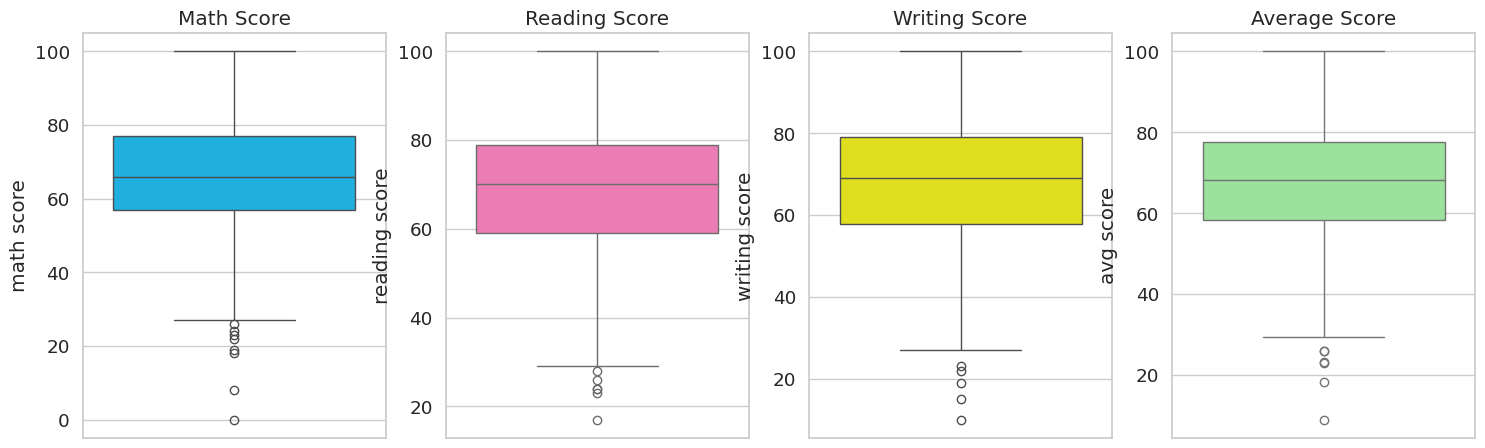

In [29]:
# Define modern color palettes
skyblue = "#00BFFF"
hotpink = "#FF69B4"
yellow = "#FFFF00"
lightgreen = "#90EE90"

# Create subplots with specified figure size
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Plot boxplots for each score column and set color using the defined palettes
sns.boxplot(df['math score'], color=skyblue, ax=axs[0])
sns.boxplot(df['reading score'], color=hotpink, ax=axs[1])
sns.boxplot(df['writing score'], color=yellow, ax=axs[2])
sns.boxplot(df['avg score'], color=lightgreen, ax=axs[3])

# Set titles for each subplot
axs[0].set_title('Math Score')
axs[1].set_title('Reading Score')
axs[2].set_title('Writing Score')
axs[3].set_title('Average Score')

# Show the plot
plt.show()

Model **Training**

In [30]:
 df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [31]:
X =df.drop(columns=['total score','avg score','math score'],axis=1)
print("Data Shape is :",X.shape)

Data Shape is : (1000, 7)


In [32]:
 Y = df['math score']
 Y.head()

,math score
0,72
1,69
2,90
3,47
4,76


In [33]:
 # Create Column Transformer with 3 types of transformers
 num_features = X.select_dtypes(exclude="object").columns
 cat_features = X.select_dtypes(include="object").columns
 from sklearn.preprocessing import OneHotEncoder, StandardScaler
 from sklearn.compose import ColumnTransformer
 numeric_transformer = StandardScaler()
 oh_transformer = OneHotEncoder()
 preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
 )

In [34]:
 X = preprocessor.fit_transform(X)
 X.shape

(1000, 19)

In [35]:
 # separate dataset into train and test
 from sklearn.model_selection import train_test_split
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
 X_train.shape, X_test.shape

((800, 19), (200, 19))

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Models **Training**

In [43]:
 models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
 }
 model_list = []
 r2_list =[]
 # Train model
 for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)
    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
-----------------------

**Results**

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.855950
7,AdaBoost Regressor,0.843085
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.782192
4,Decision Tree,0.726718


In [47]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


 Scatter Plot of Actual vs. Predicted
**bold text**

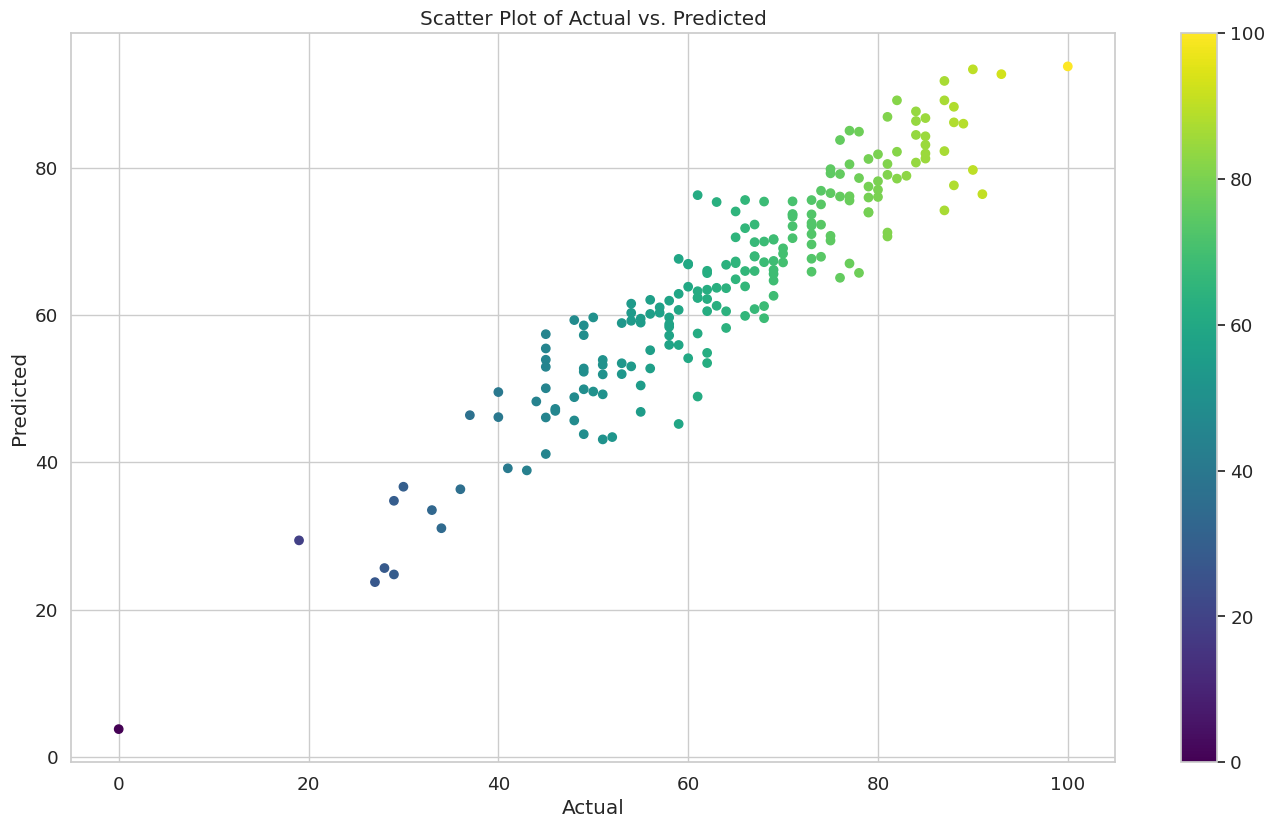

In [49]:
from matplotlib import cm
 # Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)
 # Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')
plt.show()


Regression Plot of Actual vs. **Predicted**

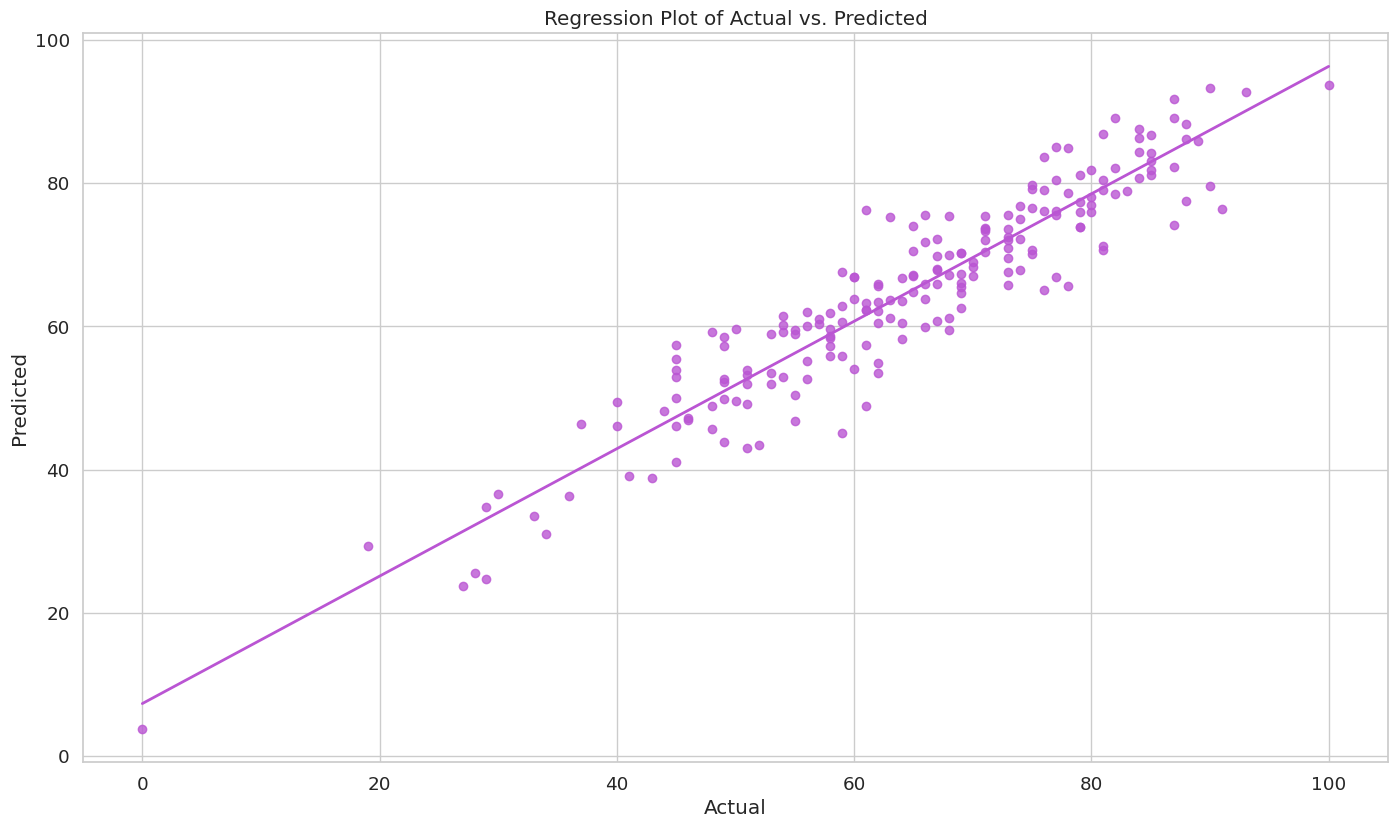

In [50]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_pred, ci=None, color='mediumorchid', line_kws={'lw':2})
# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')
plt.show()

Difference between Actual and Predicted **Values**

In [53]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': Y_pred,
    'Difference': Y_test - Y_pred
})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
